참고 : https://velog.io/@_ubuntu/Dacon-%EC%99%80%EC%9D%B8-%ED%92%88%EC%A7%88-%EC%98%88%EC%B8%A1%ED%95%98%EA%B8%B0  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
df = pd.read_csv("winequality-red.csv")

# 데이터 확인
print("Train shape : ", df.shape)
df.head()

Train shape :  (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


🏷️ 1. df.head(n)  
  
📌 역할:
	•	데이터의 처음 n개 행을 출력 (기본값 n=5)  
	•	데이터의 전체적인 구조와 형태를 빠르게 확인할 때 사용  
  
📌 df.head()의 활용 포인트  
	•	데이터의 컬럼명, 데이터 타입, 대략적인 값의 범위 등을 확인할 수 있음  
	•	데이터가 정상적으로 로드되었는지 체크할 때 사용  

In [2]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


🏷️ 2. df.describe()  
  
📌 역할:  
	•	수치형(Numeric) 데이터의 기본 통계 요약을 제공  
	•	평균(mean), 표준편차(std), 최솟값(min), 최댓값(max) 등 다양한 통계 정보 포함  
  
📌 df.describe()의 활용 포인트  
	•	데이터 분포 확인 (최소/최대값, 평균, 25%/50%/75% 분위수)  
	•	이상치(outlier) 확인 (예: max 값이 너무 크거나 min 값이 너무 작다면 이상치 가능성)  
	•	데이터 전처리(정규화, 표준화) 전, 값의 범위 파악  
  
✅ df.info()의 역할  
  
📌 df.info()는 데이터프레임의 전체적인 정보를 요약해서 보여줍니다.  
	•	컬럼 이름 및 개수  
	•	데이터 타입 (int64, float64, object 등)  
	•	각 컬럼의 결측치(누락된 값) 개수  
	•	전체 데이터 크기(메모리 사용량)  

In [3]:
# 데이터 정보 확인 (결측치 확인)
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

🎯 정리  
  
✔ 결측치 개수만 알고 싶다면? → df.isnull().sum()  
✔ 데이터 타입과 결측치도 함께 보고 싶다면? → df.info()  
✔ 결측치가 있는 컬럼만 빠르게 찾고 싶다면? → df.isnull().sum()[df.isnull().sum() > 0]  
✔ 결측치 비율(%)이 궁금하다면? → df.isnull().mean() * 100  
  
참고 : http://dacon.io/competitions/open/235698/talkboard/404470  

<Figure size 1500x1200 with 0 Axes>

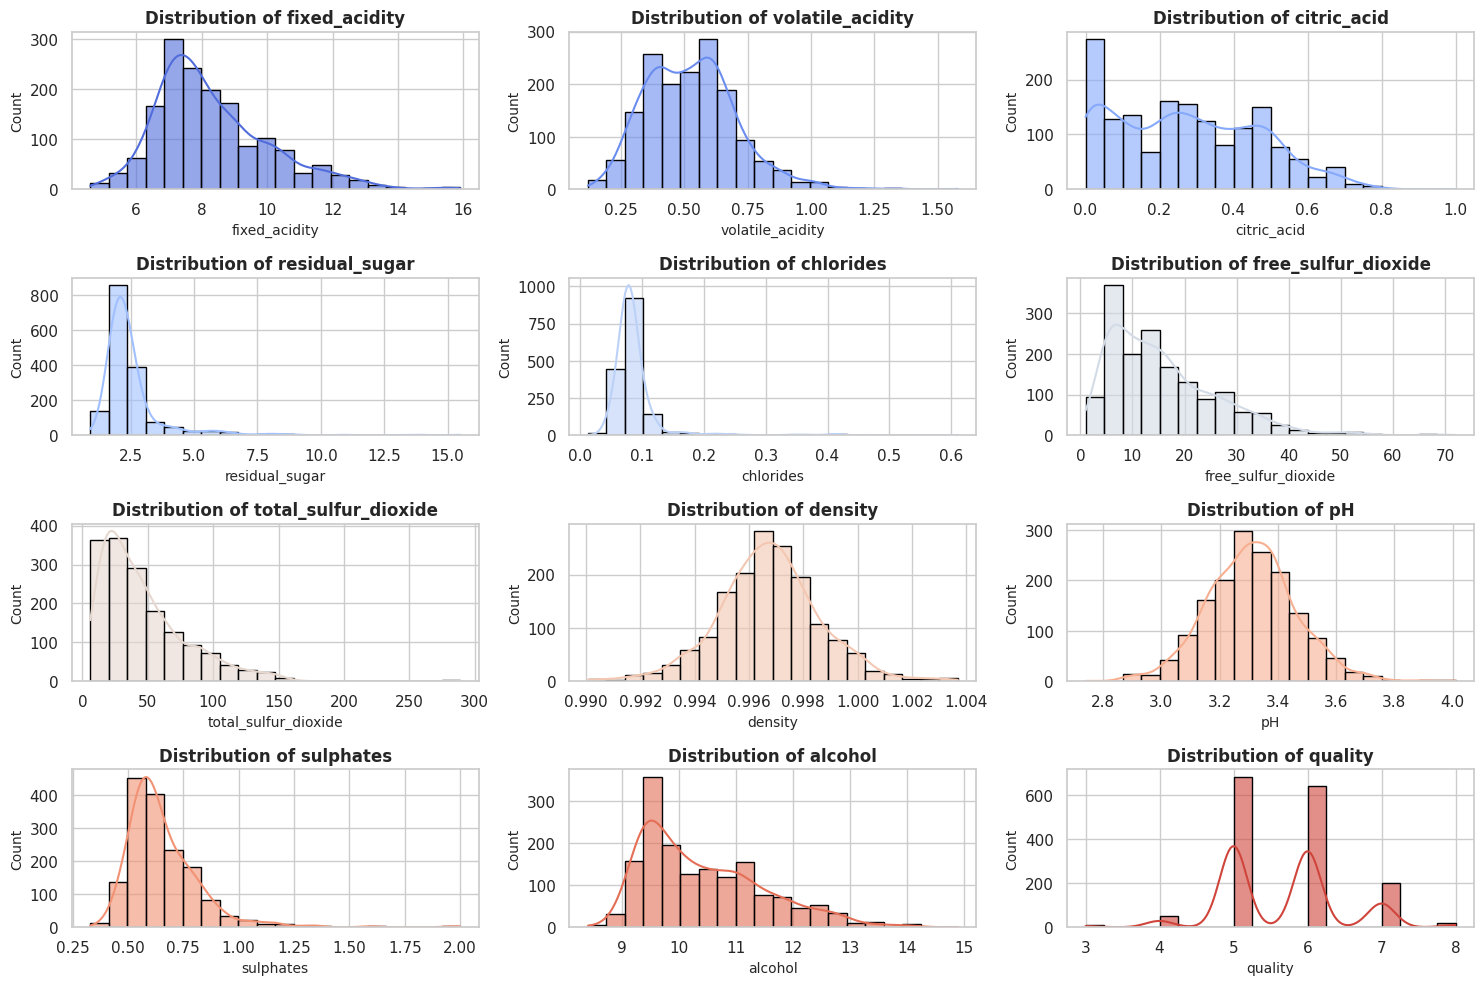

In [64]:
# 각 변수(‘pH’, ‘alcohol’, ‘sulphates’ 등) 분포 히스토그램 그려보기
# plt.plot(wine['pH'], color='green')
# plt.show()

# plt.plot(wine['alcohol'], color='blue')
# plt.show()

# plt.plot(wine['sulphates'], color='red')
# plt.show()

# plt.hist(wine['pH'], color='green')
# plt.show()

# df['wine'].hist(bins=20, color='blue')        # 첫번째 시도
#  wine.hist(bins=20, color='blue', edgecolor='black', linewidth=1.0,           # 두번째 시도
#             xlabelsize=8, ylabelsize=8, grid=False)
# plt.tight_layout(rect=(0, 0, 1.2, 1.2))
# plt.show() 

# gpt의 도움 (그래프를 조금 더 보기 좋게 그림)
# Seaborn 스타일 적용
sns.set_theme(style="whitegrid")  # 테마 설정
plt.figure(figsize=(15, 12))  # 전체 크기 조정

# 변수별 히스토그램 시각화
# features = df.columns[:-1]  # 마지막 품질(quality) 제외
# num_features = len(features)
# rows = (num_features // 3) + 1  # 3개씩 한 줄에 배치
features = df.columns[:-1]

num_features = len(features)
rows = num_features // 3 + 1

fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.histplot(df[feature], bins=20, kde=True, color=sns.color_palette("coolwarm", num_features)[i], 
                 edgecolor='black', alpha=0.6, ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}", fontsize=12, fontweight='bold')
    axes[i].set_xlabel(feature, fontsize=10)
    axes[i].set_ylabel("Count", fontsize=10)

# 빈 그래프 제거 (데이터 개수가 3의 배수가 아닐 때 필요)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


참고 : https://docs.kanaries.net/ko/topics/Pandas/pandas-plot-histogram  
참고 : https://wikidocs.net/92112  

<Axes: >

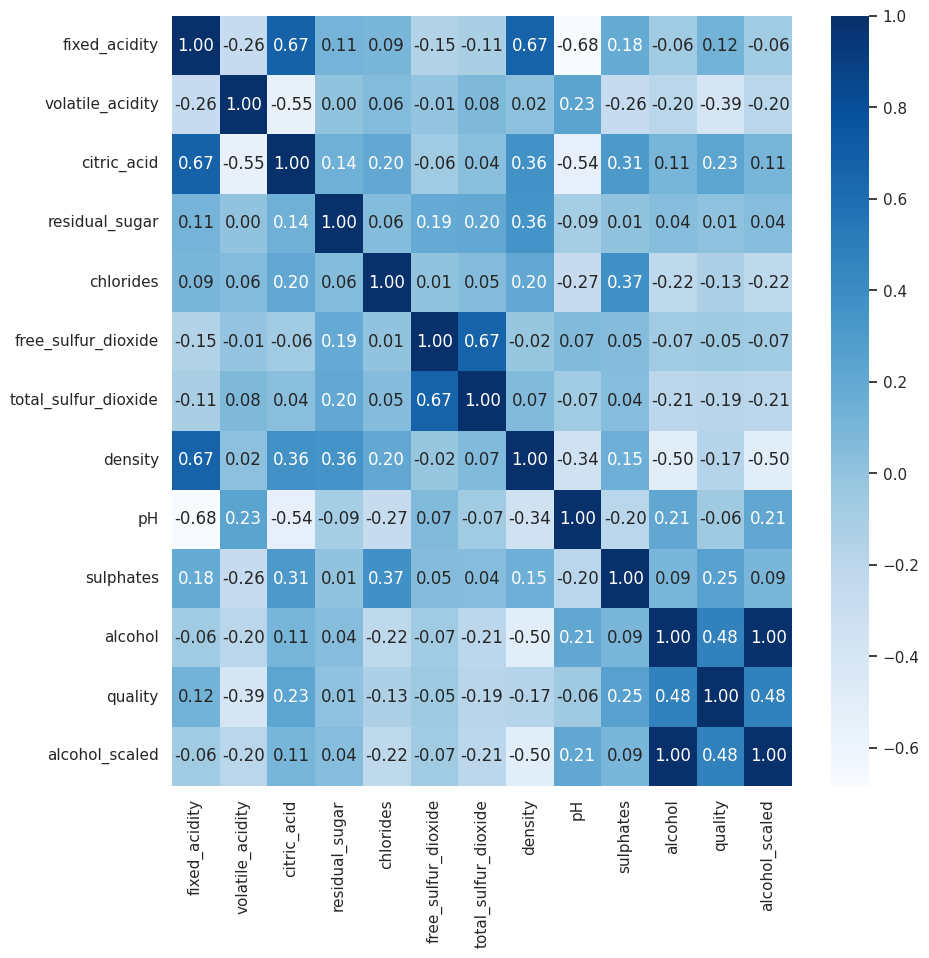

In [66]:
# 상관계수(corr) 확인하여, 어떤 변수가 품질 점수와 밀접한지 파악
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot = True, fmt = '.2f', cmap = 'Blues')



fixed actidity (고정된 산도)  
volatile acidity (휘발성 산도)  
citric acid (구연산)  
residual sugar (잔여 설탕)  
chlorides (염화물)  
free sulfur dioxide (자유 이산화황)  
total sulfur dioxide (총 이산화황)  
density (밀도)  
pH (수소 이온 농도 지수)  
sulphates (황산염)  
alcohol (알코올)  
quality (품질)  

** 높은 상관관계
fixed acidity (고정된 산도) x citrric acid (구연산)  
fixed acidity (고정된 산도)  x density (밀도)  
total sulfur dioxide (총 이산화황) x free sulfur dioxide (자유 이산화황)  
  
** 낮은 상관관계  
fixed actidity (고정된 산도) x pH (수소 이온 농도 지수)  
citric acid (구연산) x volatile acidity (휘발성 산도) 
quality (품질) x volatile acidity (휘발성 산도)  
  
의미 : 고정된 산도와 밀도, 구연산 그리고 총 이산화황과 자유 이산화황의 관계성을 가지고 품질 예측을 할 수 있다.   


In [69]:
# 필요하면 **회귀분석(OLS)**으로 유의미한 변수 파악

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, LabelEncoder

# OLS 모델 생성
# dflog = np.log(df['quality'])
# dflog = pd.concat([dflog, df.iloc[:, :-1]], axis=1)
# model = ols('quality ~ fixed acidity + volatile acidity + citric acid + residual sugar + chlorides + free sulfur dioxide + total sulfur dioxide + density + pH + sulphates + alcohol', data=df).fit()

# 변수명 정리 (공백 제거)
df.columns = df.columns.str.replace(' ', '_')

# 결측치 제거
df = df.dropna()

# # OLS 모델 생성
# formula = 'quality ~ ' + ' + '.join(df.columns[:-1])
# model = ols(formula, data=df).fit() # 모델 학습 (최소자승법)
# print(model.summary())

# # 새로운 독립 변수 리스트 (alcohol 제외)
# selected_features = ['volatile_acidity', 'sulphates']

# # 새로운 OLS 모델 생성
# formula = 'quality ~ ' + ' + '.join(selected_features)
# model = ols(formula, data=df).fit() # 모델 학습
# print(model.summary())

# 설명력 증가 위해 alcohol 변수 추가
scaler = StandardScaler()
df['alcohol_scaled'] = scaler.fit_transform(df[['alcohol']])

# 새로운 모델 (표준화한 alcohol 변수 추가)
formula_new = 'quality ~ volatile_acidity + sulphates + alcohol_scaled'
model_new = ols(formula=formula_new, data=df).fit()
print(model_new.summary())

# VIF 계산
X = df.drop(columns='quality')  # 독립변수만 선택
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\n📌 VIF 값 (다중공선성 체크)")
print(vif_data)

# p-value가 0.05보다 작은 변수들만 선택
# formula_selected = 'quality ~ alcohol + volatile_acidity + sulphates'
formula_selected = 'quality ~ volatile_acidity + sulphates'
model_selected = ols(formula=formula_selected, data=df).fit()
print(model_selected.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     268.9
Date:                Thu, 20 Feb 2025   Prob (F-statistic):          3.16e-141
Time:                        16:58:41   Log-Likelihood:                -1599.4
No. Observations:                1599   AIC:                             3207.
Df Residuals:                    1595   BIC:                             3228.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.8338      0.095  

/opt/anaconda3/envs/wine_q/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


위 표에서 P>|t| 값이 0.05보다 작은게 총 5가지로  
'alcohol', 'volatile_acidity', 'sulphates', 'total_sulfur_dioxide', 'chlorides'   
인데 fomula_seleted 에서는 'total_sulfur_dioxide', 'chlorides' 이 두 변수가  
[다중공선성 (VIF)]가 확인되서 제외시킴.  
  
다중공선성이란 ?  
통계학의 회귀분석에서 독립변수들 간에 강한 상관관계가 나타나는 문제  
OLS 회귀분석에서는 다중공선성이 높으면 모델의 신뢰성이 낮아질 수 있기 때문에 제외시켜주는게 좋다.  


alcohol이 다중공선성이 높지만 완전 제외시키기에는 모델의 설명력이 부족해져서 (설명력 : 0.336  -> 0.177 / 다중공선성 :  113 -> 11.5 로 엄청 안정화 되긴 함.)  
모델 성능을 위해 alcohol을 표준화(StanderdScaler())한 후 다시 추가 (설명력 : 0.175 -> 0.335 / 다중공산성 : 11.5 -> 11.6 )  




참고 : https://xiang32.tistory.com/13  
참고 : https://ysyblog.tistory.com/119  

In [63]:
# - **회귀**: LinearRegression, RandomForestRegressor 등으로 **연속형 품질 점수** 예측
# 머신러닝 위해서 train, test 데이터 분리

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier



X = df[['alcohol', 'volatile_acidity', 'sulphates']]
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='quality'), df['quality'], test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# LinearRegression 모델 생성
lr = LinearRegression()
lr.fit(X_train, y_train)
yr_pred = lr.predict(X_test)
print("선형 회귀 점수: ", lr.score(X_test, y_test))

# RandomForestRegressor 모델 생성
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

rf_acc = rf.score(X_test, y_test)
print("랜덤 포레스트 회귀 점수 : ", rf_acc)

# Gradient Boosting Classifier 모델 생성
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)
gbm_pred = gbm.predict(X_test)

gbm_acc = accuracy_score(y_test, gbm_pred)
print("그래디언트 부스팅 모델 정확도: {:0.4f}".format(gbm_acc))

# Logistic Regression 모델 생성
# lg = LogisticRegression()
# lg.fit(X_train, y_train)
# lg_pred = lg.predict(X_test)

# lg_acc = accuracy_score(y_test, lg_pred)
# print("Logistic Regression Model Accuracy: {:0.4f}".format(lg_acc))

log_reg = LogisticRegression(max_iter=10000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"로지스틱 회귀 모델 정확도: {accuracy:.4f}")


(1279, 12) (320, 12) (1279,) (320,)
선형 회귀 점수:  0.4031803412796209
랜덤 포레스트 회귀 점수 :  0.5174751565325244
그래디언트 부스팅 모델 정확도: 0.6344
로지스틱 회귀 모델 정확도: 0.5719


선형회귀 위해서는 데이터셋을 일단 분리 시켜서 

선형회귀 참고 : https://tensorflow.blog/2018/11/15/%EC%82%AC%EC%9D%B4%ED%82%B7%EB%9F%B0-%EC%A0%95%EC%A3%BC%ED%96%89-1-linearregression/  
train_text 참고 : https://yhyun225.tistory.com/16   
logistic 오류 참고 : https://nsbg.tistory.com/entry/Sklearn-ConvergenceWarning-lbfgs-failed-to-converge-status1

Linear Regression Score :  0.4031803412796209
